<a href="https://colab.research.google.com/github/nabilaaaa24/Machine-Learning/blob/main/ML_Praktikum_Modul_4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Buatlah sebuah model klasifikasi citra dari dataset berikut:

NIM Ganjil: [Dataset Praktikum NIM Ganjil](https://drive.google.com/file/d/17rgHOvmgE6hYkyWFgl4IMyv3OXDX_kgj/view)

# Persiapan Data

In [ ]:
!pip install gdown

import os

# Cek apakah folder sudah ada
if not os.path.exists("Dataset"):
    os.mkdir("Dataset")
    print("Folder 'Dataset' berhasil dibuat.")
else:
    print("Folder 'Dataset' sudah ada.")

Folder 'Dataset' berhasil dibuat.


In [ ]:
!gdown "17rgHOvmgE6hYkyWFgl4IMyv3OXDX_kgj" -O "Praktikum_NIM_Ganjil.zip"
!unzip "Praktikum_NIM_Ganjil.zip" -d "Dataset/"

Downloading...
From: https://drive.google.com/uc?id=17rgHOvmgE6hYkyWFgl4IMyv3OXDX_kgj
To: /content/Praktikum_NIM_Ganjil.zip
100% 2.10M/2.10M [00:00<00:00, 85.0MB/s]
Archive:  Praktikum_NIM_Ganjil.zip
   creating: Dataset/Praktikum_NIM_Ganjil/
   creating: Dataset/Praktikum_NIM_Ganjil/Beagle/
  inflating: Dataset/Praktikum_NIM_Ganjil/Beagle/Beagle_1.jpg  
  inflating: Dataset/Praktikum_NIM_Ganjil/Beagle/Beagle_10.jpg  
  inflating: Dataset/Praktikum_NIM_Ganjil/Beagle/Beagle_100.jpg  
  inflating: Dataset/Praktikum_NIM_Ganjil/Beagle/Beagle_11.jpg  
  inflating: Dataset/Praktikum_NIM_Ganjil/Beagle/Beagle_12.jpg  
  inflating: Dataset/Praktikum_NIM_Ganjil/Beagle/Beagle_13.jpg  
  inflating: Dataset/Praktikum_NIM_Ganjil/Beagle/Beagle_14.jpg  
  inflating: Dataset/Praktikum_NIM_Ganjil/Beagle/Beagle_15.jpg  
  inflating: Dataset/Praktikum_NIM_Ganjil/Beagle/Beagle_16.jpg  
  inflating: Dataset/Praktikum_NIM_Ganjil/Beagle/Beagle_17.jpg  
  inflating: Dataset/Praktikum_NIM_Ganjil/Beagle/Beagle_1

## Import Libraries

In [ ]:
!pip install tensorflow

In [ ]:
!pip install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 39.3 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


In [ ]:
!pip install pandas numpy scikit-learn tensorflow keras

In [ ]:
!pip install keras-preprocessing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf                                                           #Mengimpor modul tensorflow
import keras_preprocessing                                                        #Mengimpor modul keras
from keras_preprocessing import image                                             #Mengimpor keras_preprocessing untuk gambar
from keras_preprocessing.image import ImageDataGenerator                          #Mengimpor Image Generator

## Jumlah Data



In [ ]:
import os

beagle = '/content/Dataset/Praktikum_NIM_Ganjil/Beagle'
bulldog = '/content/Dataset/Praktikum_NIM_Ganjil/Bulldog'
german  = '/content/Dataset/Praktikum_NIM_Ganjil/German_Shepherd'
labrador = '/content/Dataset/Praktikum_NIM_Ganjil/Labrador_Retriever'
yorkshire = '/content/Dataset/Praktikum_NIM_Ganjil/Yorkshire_Terrier'

print("jumlah data :  \n")
print("Jumlah data Beagle : ", len(os.listdir(beagle)))
print("Jumlah data Bulldog : ", len(os.listdir(bulldog)))
print("Jumlah data German Shepherd : ", len(os.listdir(german)))
print("Jumlah data Labrador Retriever : ", len(os.listdir(labrador)))
print("Jumlah data Yorkshire Terrier : ", len(os.listdir(yorkshire)))

print("Menampilkan nama file gambar:")
file_beagle = os.listdir(beagle)
print("Beagle:",file_beagle[:5])

file_bulldog = os.listdir(bulldog)
print("Bulldog:",file_bulldog[:5])

file_german = os.listdir(german)
print("German Shepherd:",file_german[:5])

file_labrador = os.listdir(labrador)
print("Labrador Retriever:",file_labrador[:5])

file_yorkshire = os.listdir(yorkshire)
print("Yorkshire Terrier:",file_yorkshire[:5])

jumlah data :  

Jumlah data Beagle :  100
Jumlah data Bulldog :  100
Jumlah data German Shepherd :  96
Jumlah data Labrador Retriever :  95
Jumlah data Yorkshire Terrier :  100
Menampilkan nama file gambar:
Beagle: ['Beagle_89.jpg', 'Beagle_17.jpg', 'Beagle_67.jpg', 'Beagle_8.jpg', 'Beagle_33.jpg']
Bulldog: ['Bulldog_99.jpg', 'Bulldog_100.jpg', 'Bulldog_70.jpg', 'Bulldog_6.jpg', 'Bulldog_41.jpg']
German Shepherd: ['German Shepherd_11.jpg', 'German Shepherd_54.jpg', 'German Shepherd_70.jpg', 'German Shepherd_43.jpg', 'German Shepherd_78.jpg']
Labrador Retriever: ['Labrador Retriever_24.jpg', 'Labrador Retriever_15.jpg', 'Labrador Retriever_54.jpg', 'Labrador Retriever_77.jpg', 'Labrador Retriever_12.jpg']
Yorkshire Terrier: ['Yorkshire Terrier_60.jpg', 'Yorkshire Terrier_84.jpg', 'Yorkshire Terrier_46.jpg', 'Yorkshire Terrier_90.jpg', 'Yorkshire Terrier_24.jpg']


## Load Data

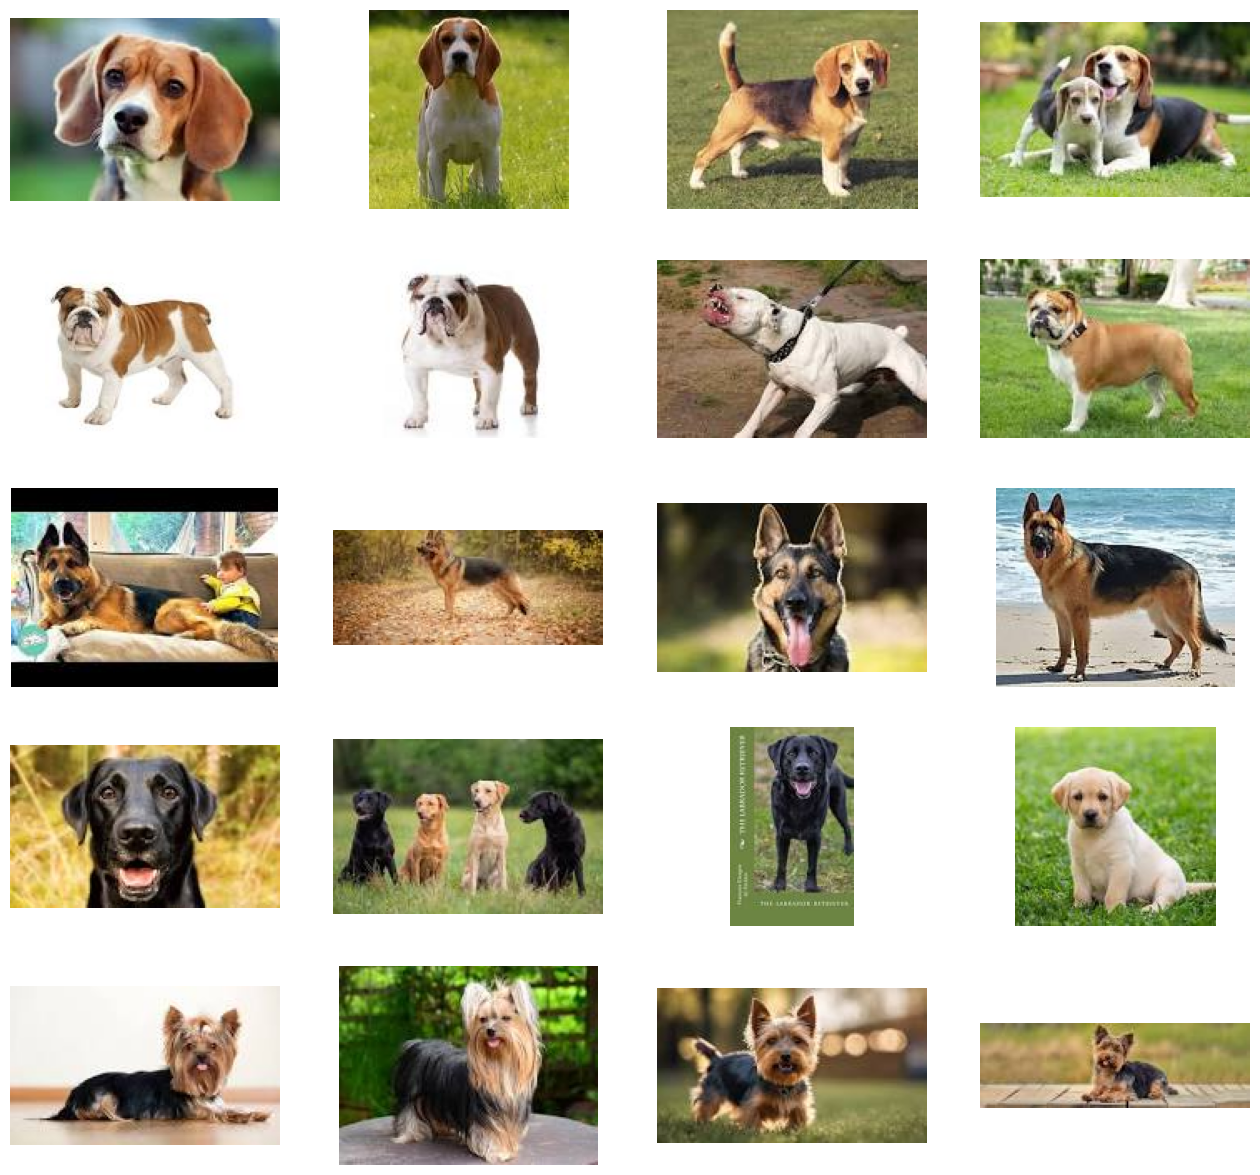

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt                                                     #Mengimpor modul matplotlib
import matplotlib.image as mpimg

nrows = 5                                                                           #Jumlah baris tampilan gambar, diubah agar sesuai dengan jumlah data
ncols = 4                                                                           #Jumlah baris tampilan gambar

pic_index = 0                                                                        #Index awal untuk iterasi gambar

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 3)                                           #Mengatur gambar output matplotlib, dan ukurannya agar menjadi 4*6 gambar

pic_index += 4                                                                      #Index tambah bertambah 4 setiap baris
gbr_tampil_beagle  = [os.path.join(beagle, fname)
                      for fname in file_beagle[pic_index-4:pic_index]]

gbr_tampil_bulldog  = [os.path.join(bulldog, fname)
                      for fname in file_bulldog[pic_index-4:pic_index]]

gbr_tampil_german  = [os.path.join(german, fname)
                      for fname in file_german[pic_index-4:pic_index]]

gbr_tampil_labrador  = [os.path.join(labrador, fname)
                      for fname in file_labrador[pic_index-4:pic_index]]

gbr_tampil_yorkshire  = [os.path.join(yorkshire, fname)
                      for fname in file_yorkshire[pic_index-4:pic_index]]



for i, img_path in enumerate(gbr_tampil_beagle+gbr_tampil_bulldog+gbr_tampil_german+gbr_tampil_labrador+gbr_tampil_yorkshire):
  sp = plt.subplot(nrows, ncols, i + 1)                             #Mengatur subplot; indeks subplot dimulai dari 1
  sp.axis('Off')                                                    #Tidak menampilkan Gridlines

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# Cek Size

In [ ]:
# prompt: cek size citra

import PIL.Image

def cek_ukuran_citra(path):
  """
  Mengecek ukuran citra dalam folder
  """

  for filename in os.listdir(path):
      if filename.endswith(".jpg") or filename.endswith(".png"):
          img_path = os.path.join(path, filename)
          try:
              with PIL.Image.open(img_path) as img:
                  width, height = img.size
                  print(f"File: {filename}, Ukuran: {width}x{height}")
          except Exception as e:
              print(f"Gagal membuka atau memproses {filename}: {e}")


cek_ukuran_citra(beagle)
cek_ukuran_citra(bulldog)
cek_ukuran_citra(german)
cek_ukuran_citra(labrador)
cek_ukuran_citra(yorkshire)

File: Beagle_89.jpg, Ukuran: 162x110
File: Beagle_17.jpg, Ukuran: 140x140
File: Beagle_67.jpg, Ukuran: 162x129
File: Beagle_8.jpg, Ukuran: 162x105
File: Beagle_33.jpg, Ukuran: 136x140
File: Beagle_82.jpg, Ukuran: 162x108
File: Beagle_88.jpg, Ukuran: 162x129
File: Beagle_90.jpg, Ukuran: 162x91
File: Beagle_52.jpg, Ukuran: 148x140
File: Beagle_20.jpg, Ukuran: 162x108
File: Beagle_19.jpg, Ukuran: 162x108
File: Beagle_76.jpg, Ukuran: 162x91
File: Beagle_25.jpg, Ukuran: 162x129
File: Beagle_18.jpg, Ukuran: 93x140
File: Beagle_32.jpg, Ukuran: 162x108
File: Beagle_10.jpg, Ukuran: 148x140
File: Beagle_98.jpg, Ukuran: 162x91
File: Beagle_22.jpg, Ukuran: 162x107
File: Beagle_73.jpg, Ukuran: 148x140
File: Beagle_6.jpg, Ukuran: 162x91
File: Beagle_40.jpg, Ukuran: 162x108
File: Beagle_54.jpg, Ukuran: 136x140
File: Beagle_44.jpg, Ukuran: 162x108
File: Beagle_41.jpg, Ukuran: 162x108
File: Beagle_62.jpg, Ukuran: 162x121
File: Beagle_29.jpg, Ukuran: 162x105
File: Beagle_66.jpg, Ukuran: 162x130
File: Be

# Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder
import os

# Define the labels corresponding to your image categories
labels = ['beagle'] * len(os.listdir(beagle)) + \
         ['bulldog'] * len(os.listdir((bulldog))) + \
         ['german'] * len(os.listdir(german)) + \
         ['labrador'] * len(os.listdir(labrador)) + \
         ['yorkshire'] * len(os.listdir(yorkshire))

# Now you can use the LabelEncoder
lb = LabelEncoder()
encoded_labels = lb.fit_transform(labels)  # Change variable name for clarity
print(encoded_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4]


# Train Data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = '/content/Dataset/Praktikum_NIM_Ganjil'
img_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 20% for validation
    # The seed parameter is not available in this version of Keras
)


train_generator = train_datagen.flow_from_directory( # Changed 'training_datagen' to 'train_datagen'
    '/content/Dataset/Praktikum_NIM_Ganjil',            # Path ke direktori data pelatihan yang benar
    target_size=(224, 224),          # Resize gambar menjadi ukuran 150x150 piksel
    batch_size=32,                   # Ukuran batch
    class_mode='categorical'          # Changed to 'categorical' for one-hot encoded labels
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical', # Changed to 'categorical' to match train_generator
    subset='validation',
    seed=123
)

Found 491 images belonging to 5 classes.
Found 98 images belonging to 5 classes.


#Augmentasi

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Inisialisasi objek ImageDataGenerator untuk augmentasi data
training_datagen = ImageDataGenerator(
    rescale=1./255,                  # Menormalisasi data
    rotation_range=40,               # Menerapkan skenario rotasi gambar hingga 40 derajat
    width_shift_range=0.2,           # Menerapkan skenario pelebaran gambar hingga sebanyak 0.2 dari ukuran asli
    height_shift_range=0.2,          # Menerapkan skenario peninggian gambar hingga sebanyak 0.2 dari ukuran asli
    shear_range=0.2,                 # Menerapkan skenario pemangkasan gambar hingga sebanyak 0.2 dari ukuran asli
    zoom_range=0.2,                  # Menerapkan skenario zoom gambar hingga sebesar 0.2
    horizontal_flip=True,            # Menerapkan skenario putar balik gambar secara horizontal
    fill_mode='nearest'              # Metode pengisian piksel yang kosong
)

# Load data dan resize gambar menggunakan flow_from_directory atau flow
# Ganti 'path/to/train_data' dengan path direktori data pelatihan Anda
train_generator = training_datagen.flow_from_directory(
    '/content/Dataset/Praktikum_NIM_Ganjil',            # Path ke direktori data pelatihan yang benar
    target_size=(224, 224),          # Resize gambar menjadi ukuran 150x150 piksel
    batch_size=32,                   # Ukuran batch
    class_mode='categorical'              # Klasifikasi biner # ubah ke categorical jika lebih dari 2 kelas
)

Found 491 images belonging to 5 classes.


# Bangun Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Rescaling

# Define the input shape to match the image size used in the data generators
img_size = (224, 224)

model = Sequential([
    # Conv layer 1
    Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=(*img_size, 3)), # Update input shape
    BatchNormalization(),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),

    # Conv layer 2
    Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),

    # Conv layer 3
    Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
    BatchNormalization(),

    # Conv layer 4
    Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),

    # Fully Connected Layers
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  # Output layer for 5 classes # Changed from 10 to 5 to match the number of classes in your dataset
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 54, 54, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 54, 54, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 26, 26, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 26, 26, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 26, 26, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 12, 12, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 12, 12, 384)         │           1,536 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4096)                │      26,218,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │          20,485 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,443,973 (173.35 MB)

 Trainable params: 45,441,989 (173.35 MB)

 Non-trainable params: 1,984 (7.75 KB)

## Pelatihan Model

In [ ]:
# Callbacks for Early Stopping and Learning Rate Scheduling
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
# Training the model
epochs=50
history = model.fit(
    train_generator,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 280ms/step - accuracy: 0.6994 - loss: 0.8559 - val_accuracy: 0.7755 - val_loss: 0.7487
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 226ms/step - accuracy: 0.6443 - loss: 0.8265 - val_accuracy: 0.7755 - val_loss: 0.7264
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 241ms/step - accuracy: 0.6908 - loss: 0.7535 - val_accuracy: 0.7857 - val_loss: 0.7072
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 213ms/step - accuracy: 0.6223 - loss: 0.8873 - val_accuracy: 0.8367 - val_loss: 0.6483
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 296ms/step - accuracy: 0.6729 - loss: 0.8436 - val_accuracy: 0.8571 - val_loss: 0.6102
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 270ms/step - accuracy: 0.6446 - loss: 0.7854 - val_accuracy: 0.8878 - val_loss: 0.5738
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 228ms/step - accuracy: 0.6654 - loss: 0.8520 - val_accuracy: 0.8673 - val_loss: 0.5608
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 254ms/step - accuracy: 0.6888 - loss: 0.8083 - val_accuracy

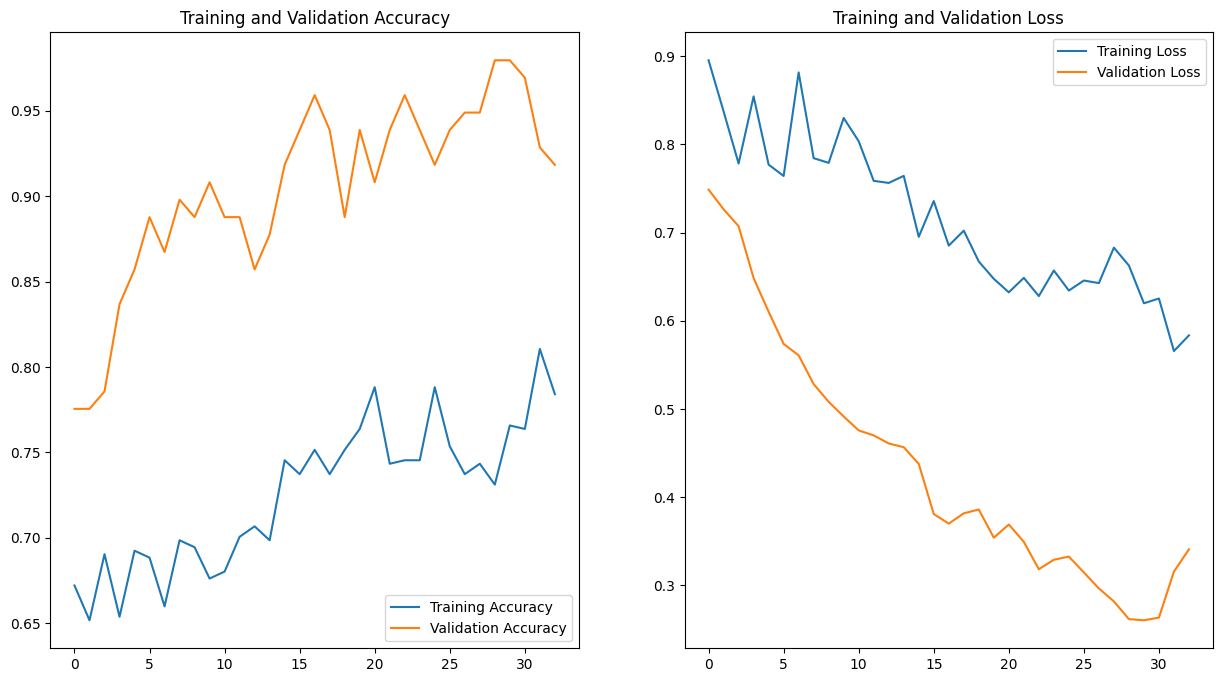

In [ ]:
# Plot Training and Validation Accuracy and Loss
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(range(len(history.history['accuracy'])), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(len(history.history['val_accuracy'])), history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(len(history.history['loss'])), history.history['loss'], label='Training Loss')
plt.plot(range(len(history.history['val_loss'])), history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Evaluasi

In [ ]:
loss, accuracy = model.evaluate(validation_generator)
print('Test accuracy :', accuracy)
print('Test loss :', loss)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9783 - loss: 0.2703
Test accuracy : 0.9795918464660645
Test loss : 0.2604781687259674


In [ ]:
y_true = []
y_pred = []

for i, (images, labels) in enumerate(validation_generator):
    if i >= 10:  # Hentikan setelah 10 batch
        break

    batch_predictions = model.predict(images)
    batch_pred_labels = np.argmax(batch_predictions, axis=1)
    y_true.extend(np.argmax(labels, axis=1))  # Konversi one-hot encoding ke label
    y_pred.extend(batch_pred_labels)

y_true = np.array(y_true)
y_pred = np.array(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [ ]:
from sklearn.metrics import classification_report
CLASSES = ['beagle', 'bulldog', 'german', 'labrador', 'yorkshire']
print(classification_report(y_true, y_pred, target_names=CLASSES))

              precision    recall  f1-score   support

      beagle       1.00      0.94      0.97        52
     bulldog       1.00      0.96      0.98        54
      german       1.00      1.00      1.00        48
    labrador       1.00      1.00      1.00        50
   yorkshire       0.92      1.00      0.96        56

    accuracy                           0.98       260
   macro avg       0.98      0.98      0.98       260
weighted avg       0.98      0.98      0.98       260



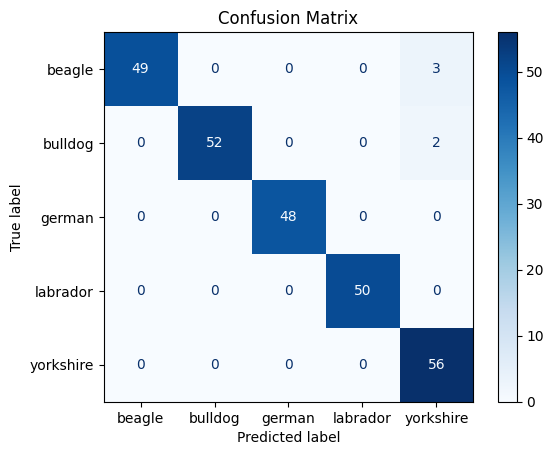

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Menghitung confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Membuat objek ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CLASSES)

# Menampilkan confusion matrix
disp.plot(cmap=plt.cm.Blues)  # Menggunakan colormap biru
plt.title("Confusion Matrix")   # Menambahkan judul
plt.show()